In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.append('./..')
sys.path.append('./../..')
import torch
import math
import yaml
from sklearn.metrics import auc
from tqdm import tqdm
from collections import OrderedDict
from matplotlib import pyplot as plt
from pathlib import Path
 
import multiprocessing
from pprint import pprint
from time import time
from datetime import datetime
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Current device  >> ', DEVICE)

Current device  >>  cuda


In [11]:
from sklearn.manifold import TSNE

In [9]:
try:
    from data_fetcher import data_fetcher
except:
    from .data_fetcher import data_fetcher
try:
    from model_9.model import model_9_container as Model
except:
    from .model_9.model import model_9_container as Model

try:
    from model_6 import utils as utils
except:
    from .model_6 import utils as utils

try:
    from model_6 import model_data_fetcher
except:
    from .model_6 import model_data_fetcher as model_data_fetcher

In [12]:
def execute_run(
        DATA_SET,
        pos,
        neg,
        data_dict,
        config
):

    encoder_structure_config, decoder_structure_config, loss_structure_config, latent_dim = utils.create_config(DATA_SET)
    anomaly_ratio = -1
    ae_model = None

    burn_in_epochs = config['burn_in_epochs']
    phase_2_epochs = config['phase_2_epochs']
    phase_3_epochs = config['phase_3_epochs']
    batch_size = config['batch_size']
    ae_dropout = config['ae_dropout']
    fc_dropout = config['fc_dropout']
    
    LR = config['LR']
    max_gamma = config['max_gamma']

    # ===============
    # 1. Train with noise
    # ===============
    not_converged = True
    while not_converged:
        ae_model = Model(
            DATA_SET,
            DEVICE,
            latent_dim,
            encoder_structure_config,
            decoder_structure_config,
            loss_structure_config,
            batch_size=batch_size,
            fc_dropout=fc_dropout,
            ae_dropout=ae_dropout,
            learning_rate=LR,
            max_gamma=max_gamma,
            burn_in_epochs=burn_in_epochs,
            phase_2_epochs=phase_2_epochs,
            phase_3_epochs=phase_3_epochs,
        )

        _, epoch_losses_phase_3 = ae_model.train_model(
            pos,
            neg
        )
        print(epoch_losses_phase_3)
        if epoch_losses_phase_3[-1] < epoch_losses_phase_3[0]:
            not_converged = False
            
    ae_model.mode = 'test'
    return ae_model

In [13]:
DATA_SET = 'kddcup'
config_file = 'architecture_config.yaml'
with open(config_file, 'r') as fh:
    config = yaml.safe_load(fh)
config = config[DATA_SET]
num_anomaly_sets = 5
anomaly_ratio = config['anomaly_ratio']

pos, neg, data_dict = model_data_fetcher.fetch_model_data(
    DATA_SET,
    num_anom_sets=num_anomaly_sets,
    anomaly_ratio=anomaly_ratio
)

97278 972780


In [14]:
ae_model = execute_run(
        DATA_SET,
        pos,
        neg,
        data_dict,
        config
)

Sacving checkpoints to ::  checkpoints/kddcup/1598837323
split schema  [3, 65, 11, 1, 1, 1, 34]


  0%|          | 0/85 [00:00<?, ?it/s]

Loss structure config {'discrete_dims': OrderedDict([('protocol_type', 3), ('service', 65), ('flag', 11), ('land', 2), ('logged_in', 2), ('is_guest_login', 2)]), 'real_loss_func': 'smooth_l1', 'real_dims': 34}
 Loss module split schema  [3, 65, 11, 1, 1, 1, 34]
Normal(loc: torch.Size([16]), scale: torch.Size([16]))
 Epoch 1 Batch 0 Loss 28.7724 || AE 28.7724 1.3940 
 Epoch 1 Batch 100 Loss 2.8692 || AE 2.8692 1.3916 
 Epoch 1 Batch 200 Loss 2.1921 || AE 2.1921 1.3917 


  1%|          | 1/85 [00:08<11:57,  8.54s/it]

Epoch loss :: 7.061967
 Epoch 2 Batch 0 Loss 2.3699 || AE 2.3699 1.3926 
 Epoch 2 Batch 100 Loss 2.0299 || AE 2.0299 1.3935 
 Epoch 2 Batch 200 Loss 2.1696 || AE 2.1696 1.3940 


  2%|▏         | 2/85 [00:16<11:36,  8.39s/it]

Epoch loss :: 2.0627263
 Epoch 3 Batch 0 Loss 2.0866 || AE 2.0866 1.3923 
 Epoch 3 Batch 100 Loss 2.1752 || AE 2.1752 1.3945 
 Epoch 3 Batch 200 Loss 2.1048 || AE 2.1048 1.3939 


  4%|▎         | 3/85 [00:24<11:19,  8.28s/it]

Epoch loss :: 2.0413103
 Epoch 4 Batch 0 Loss 1.9326 || AE 1.9326 1.3918 
 Epoch 4 Batch 100 Loss 2.0433 || AE 2.0433 1.3899 
 Epoch 4 Batch 200 Loss 2.1210 || AE 2.1210 1.3964 


  5%|▍         | 4/85 [00:32<11:03,  8.19s/it]

Epoch loss :: 2.0267894
 Epoch 5 Batch 0 Loss 1.8567 || AE 1.8567 1.3962 
 Epoch 5 Batch 100 Loss 1.9624 || AE 1.9624 1.4005 
 Epoch 5 Batch 200 Loss 1.7400 || AE 1.7400 1.4006 


  6%|▌         | 5/85 [00:40<10:50,  8.13s/it]

Epoch loss :: 1.7616408
 Epoch 6 Batch 0 Loss 1.3286 || AE 1.3286 1.3952 
 Epoch 6 Batch 100 Loss 1.1572 || AE 1.1572 1.3982 
 Epoch 6 Batch 200 Loss 1.1368 || AE 1.1368 1.3929 


  7%|▋         | 6/85 [00:48<10:40,  8.10s/it]

Epoch loss :: 1.0932424
 Epoch 7 Batch 0 Loss 0.8870 || AE 0.8870 1.3937 
 Epoch 7 Batch 100 Loss 0.9481 || AE 0.9481 1.3955 
 Epoch 7 Batch 200 Loss 0.7605 || AE 0.7605 1.3937 


  8%|▊         | 7/85 [00:56<10:27,  8.05s/it]

Epoch loss :: 0.88552487
 Epoch 8 Batch 0 Loss 0.7833 || AE 0.7833 1.3913 
 Epoch 8 Batch 100 Loss 0.7969 || AE 0.7969 1.3942 
 Epoch 8 Batch 200 Loss 0.6871 || AE 0.6871 1.3928 


  9%|▉         | 8/85 [01:04<10:17,  8.02s/it]

Epoch loss :: 0.7293034
 Epoch 9 Batch 0 Loss 0.7299 || AE 0.7299 1.3916 
 Epoch 9 Batch 100 Loss 0.7392 || AE 0.7392 1.3996 
 Epoch 9 Batch 200 Loss 0.6376 || AE 0.6376 1.3940 


 11%|█         | 9/85 [01:12<10:07,  7.99s/it]

Epoch loss :: 0.65198255
 Epoch 10 Batch 0 Loss 0.6676 || AE 0.6676 1.3951 
 Epoch 10 Batch 100 Loss 0.6189 || AE 0.6189 1.3936 
 Epoch 10 Batch 200 Loss 0.5852 || AE 0.5852 1.3955 


 12%|█▏        | 10/85 [01:20<09:51,  7.89s/it]

Epoch loss :: 0.61566645
 Epoch 11 Batch 0 Loss 0.6025 || AE 0.6025 1.3950 
 Epoch 11 Batch 100 Loss 0.5613 || AE 0.5613 1.3950 
 Epoch 11 Batch 200 Loss 0.5389 || AE 0.5389 1.3942 


 13%|█▎        | 11/85 [01:28<09:46,  7.92s/it]

Epoch loss :: 0.58326226
 Epoch 12 Batch 0 Loss 0.5786 || AE 0.5786 1.3960 
 Epoch 12 Batch 100 Loss 0.5734 || AE 0.5734 1.3931 
 Epoch 12 Batch 200 Loss 0.5843 || AE 0.5843 1.3934 


 14%|█▍        | 12/85 [01:35<09:35,  7.88s/it]

Epoch loss :: 0.5455581
 Epoch 13 Batch 0 Loss 0.4574 || AE 0.4574 1.3920 
 Epoch 13 Batch 100 Loss 0.4548 || AE 0.4548 1.3963 
 Epoch 13 Batch 200 Loss 0.5870 || AE 0.5870 1.3942 


 15%|█▌        | 13/85 [01:44<09:34,  7.98s/it]

Epoch loss :: 0.5203699
 Epoch 14 Batch 0 Loss 0.4457 || AE 0.4457 1.3914 
 Epoch 14 Batch 100 Loss 0.4740 || AE 0.4740 1.3936 
 Epoch 14 Batch 200 Loss 0.4654 || AE 0.4654 1.3896 


 16%|█▋        | 14/85 [01:52<09:30,  8.03s/it]

Epoch loss :: 0.49837303
 Epoch 15 Batch 0 Loss 0.4454 || AE 0.4454 1.3967 
 Epoch 15 Batch 100 Loss 0.4560 || AE 0.4560 1.3944 
 Epoch 15 Batch 200 Loss 0.5363 || AE 0.5363 1.3961 


 18%|█▊        | 15/85 [02:00<09:17,  7.96s/it]

Epoch loss :: 0.46613628
 Epoch 16 Batch 0 Loss 0.3666 || AE 0.3666 1.3970 
 Epoch 16 Batch 100 Loss 0.4396 || AE 0.4396 1.3947 
 Epoch 16 Batch 200 Loss 0.4041 || AE 0.4041 1.3955 


 19%|█▉        | 16/85 [02:08<09:11,  7.99s/it]

Epoch loss :: 0.43151054
 Epoch 17 Batch 0 Loss 0.3785 || AE 0.3785 1.3961 
 Epoch 17 Batch 100 Loss 0.3680 || AE 0.3680 1.3924 
 Epoch 17 Batch 200 Loss 0.3703 || AE 0.3703 1.3918 


 20%|██        | 17/85 [02:15<09:00,  7.95s/it]

Epoch loss :: 0.389272
 Epoch 18 Batch 0 Loss 0.3869 || AE 0.3869 1.3951 
 Epoch 18 Batch 100 Loss 0.3501 || AE 0.3501 1.3905 
 Epoch 18 Batch 200 Loss 0.3633 || AE 0.3633 1.3929 


 21%|██        | 18/85 [02:23<08:49,  7.91s/it]

Epoch loss :: 0.35987106
 Epoch 19 Batch 0 Loss 0.3525 || AE 0.3525 1.3944 
 Epoch 19 Batch 100 Loss 0.3518 || AE 0.3518 1.3908 
 Epoch 19 Batch 200 Loss 0.3133 || AE 0.3133 1.3927 


 22%|██▏       | 19/85 [02:32<08:49,  8.02s/it]

Epoch loss :: 0.33803678
 Epoch 20 Batch 0 Loss 0.3377 || AE 0.3377 1.3948 
 Epoch 20 Batch 100 Loss 0.2982 || AE 0.2982 1.3900 
 Epoch 20 Batch 200 Loss 0.2750 || AE 0.2750 1.3909 


 24%|██▎       | 20/85 [02:39<08:36,  7.94s/it]

Epoch loss :: 0.3213817
 Epoch 21 Batch 0 Loss 0.2711 || AE 0.2711 1.3865 
 Epoch 21 Batch 100 Loss 0.2732 || AE 0.2732 1.3922 
 Epoch 21 Batch 200 Loss 0.2980 || AE 0.2980 1.3869 


 25%|██▍       | 21/85 [02:48<08:34,  8.03s/it]

Epoch loss :: 0.3086768
 Epoch 22 Batch 0 Loss 0.2931 || AE 0.2931 1.3929 
 Epoch 22 Batch 100 Loss 0.3842 || AE 0.3842 1.3864 
 Epoch 22 Batch 200 Loss 0.2187 || AE 0.2187 1.3900 


 26%|██▌       | 22/85 [02:56<08:30,  8.11s/it]

Epoch loss :: 0.29948616
 Epoch 23 Batch 0 Loss 0.3353 || AE 0.3353 1.3878 
 Epoch 23 Batch 100 Loss 0.2680 || AE 0.2680 1.3898 
 Epoch 23 Batch 200 Loss 0.2741 || AE 0.2741 1.3909 


 27%|██▋       | 23/85 [03:04<08:24,  8.13s/it]

Epoch loss :: 0.29171094
 Epoch 24 Batch 0 Loss 0.3080 || AE 0.3080 1.3918 
 Epoch 24 Batch 100 Loss 0.2593 || AE 0.2593 1.3897 
 Epoch 24 Batch 200 Loss 0.3108 || AE 0.3108 1.3882 


 28%|██▊       | 24/85 [03:12<08:12,  8.07s/it]

Epoch loss :: 0.2847641
 Epoch 25 Batch 0 Loss 0.2971 || AE 0.2971 1.3886 
 Epoch 25 Batch 100 Loss 0.2430 || AE 0.2430 1.3906 
 Epoch 25 Batch 200 Loss 0.3188 || AE 0.3188 1.3897 


 29%|██▉       | 25/85 [03:20<08:00,  8.01s/it]

Epoch loss :: 0.27990618
 Epoch 26 Batch 0 Loss 0.2606 || AE 0.2606 1.3902 
 Epoch 26 Batch 100 Loss 0.2849 || AE 0.2849 1.3926 
 Epoch 26 Batch 200 Loss 0.2700 || AE 0.2700 1.3938 


 31%|███       | 26/85 [03:28<07:57,  8.09s/it]

Epoch loss :: 0.27520007
 Epoch 27 Batch 0 Loss 0.2429 || AE 0.2429 1.3899 
 Epoch 27 Batch 100 Loss 0.2407 || AE 0.2407 1.3941 
 Epoch 27 Batch 200 Loss 0.2689 || AE 0.2689 1.3917 


 32%|███▏      | 27/85 [03:36<07:42,  7.97s/it]

Epoch loss :: 0.27050668
 Epoch 28 Batch 0 Loss 0.2680 || AE 0.2680 1.3937 
 Epoch 28 Batch 100 Loss 0.2768 || AE 0.2768 1.3909 
 Epoch 28 Batch 200 Loss 0.2465 || AE 0.2465 1.3891 


 33%|███▎      | 28/85 [03:43<07:30,  7.90s/it]

Epoch loss :: 0.2666865
 Epoch 29 Batch 0 Loss 0.2770 || AE 0.2770 1.3904 
 Epoch 29 Batch 100 Loss 0.2693 || AE 0.2693 1.3875 
 Epoch 29 Batch 200 Loss 0.2618 || AE 0.2618 1.3906 


 34%|███▍      | 29/85 [03:51<07:19,  7.84s/it]

Epoch loss :: 0.26302746
 Epoch 30 Batch 0 Loss 0.2202 || AE 0.2202 1.3897 
 Epoch 30 Batch 100 Loss 0.2579 || AE 0.2579 1.3914 
 Epoch 30 Batch 200 Loss 0.2096 || AE 0.2096 1.3880 


 35%|███▌      | 30/85 [03:59<07:14,  7.90s/it]

Epoch loss :: 0.25993156
 Epoch 31 Batch 0 Loss 0.2614 || AE 0.2614 1.3920 
 Epoch 31 Batch 100 Loss 0.2330 || AE 0.2330 1.3933 
 Epoch 31 Batch 200 Loss 0.2749 || AE 0.2749 1.3937 


 36%|███▋      | 31/85 [04:07<07:04,  7.85s/it]

Epoch loss :: 0.2572457
 Epoch 32 Batch 0 Loss 0.3090 || AE 0.3090 1.3909 
 Epoch 32 Batch 100 Loss 0.3470 || AE 0.3470 1.3900 
 Epoch 32 Batch 200 Loss 0.2442 || AE 0.2442 1.3884 


 38%|███▊      | 32/85 [04:15<06:57,  7.89s/it]

Epoch loss :: 0.25321868
 Epoch 33 Batch 0 Loss 0.2789 || AE 0.2789 1.3914 
 Epoch 33 Batch 100 Loss 0.2194 || AE 0.2194 1.3903 
 Epoch 33 Batch 200 Loss 0.2281 || AE 0.2281 1.3913 


 39%|███▉      | 33/85 [04:23<06:51,  7.91s/it]

Epoch loss :: 0.24982366
 Epoch 34 Batch 0 Loss 0.2860 || AE 0.2860 1.3951 
 Epoch 34 Batch 100 Loss 0.2338 || AE 0.2338 1.3910 
 Epoch 34 Batch 200 Loss 0.2545 || AE 0.2545 1.3898 


 40%|████      | 34/85 [04:31<06:42,  7.90s/it]

Epoch loss :: 0.24736746
 Epoch 35 Batch 0 Loss 0.2269 || AE 0.2269 1.3915 
 Epoch 35 Batch 100 Loss 0.2557 || AE 0.2557 1.3921 
 Epoch 35 Batch 200 Loss 0.2512 || AE 0.2512 1.3935 


 41%|████      | 35/85 [04:38<06:28,  7.77s/it]

Epoch loss :: 0.24394254
 Epoch 36 Batch 0 Loss 0.2656 || AE 0.2656 1.3913 
 Epoch 36 Batch 100 Loss 0.2441 || AE 0.2441 1.3898 
 Epoch 36 Batch 200 Loss 0.2434 || AE 0.2434 1.3919 


 42%|████▏     | 36/85 [04:46<06:23,  7.83s/it]

Epoch loss :: 0.24146104
 Epoch 37 Batch 0 Loss 0.2161 || AE 0.2161 1.3921 
 Epoch 37 Batch 100 Loss 0.2509 || AE 0.2509 1.3903 
 Epoch 37 Batch 200 Loss 0.2295 || AE 0.2295 1.3935 


 44%|████▎     | 37/85 [04:54<06:16,  7.85s/it]

Epoch loss :: 0.24057826
 Epoch 38 Batch 0 Loss 0.2762 || AE 0.2762 1.3935 
 Epoch 38 Batch 100 Loss 0.3180 || AE 0.3180 1.3902 
 Epoch 38 Batch 200 Loss 0.2789 || AE 0.2789 1.3910 


 45%|████▍     | 38/85 [05:02<06:11,  7.90s/it]

Epoch loss :: 0.23854949
 Epoch 39 Batch 0 Loss 0.2466 || AE 0.2466 1.3931 
 Epoch 39 Batch 100 Loss 0.1841 || AE 0.1841 1.3917 
 Epoch 39 Batch 200 Loss 0.2378 || AE 0.2378 1.3911 


 46%|████▌     | 39/85 [05:10<06:01,  7.86s/it]

Epoch loss :: 0.23784234
 Epoch 40 Batch 0 Loss 0.2446 || AE 0.2446 1.3913 
 Epoch 40 Batch 100 Loss 0.1785 || AE 0.1785 1.3917 
 Epoch 40 Batch 200 Loss 0.2579 || AE 0.2579 1.3938 


 47%|████▋     | 40/85 [05:18<05:59,  7.98s/it]

Epoch loss :: 0.23570763
 Epoch 41 Batch 0 Loss 0.2212 || AE 0.2212 1.3906 
 Epoch 41 Batch 100 Loss 0.2448 || AE 0.2448 1.3900 
 Epoch 41 Batch 200 Loss 0.2390 || AE 0.2390 1.3949 


 48%|████▊     | 41/85 [05:26<05:46,  7.88s/it]

Epoch loss :: 0.23440434
 Epoch 42 Batch 0 Loss 0.2261 || AE 0.2261 1.3923 
 Epoch 42 Batch 100 Loss 0.2523 || AE 0.2523 1.3911 
 Epoch 42 Batch 200 Loss 0.2413 || AE 0.2413 1.3928 


 49%|████▉     | 42/85 [05:34<05:38,  7.88s/it]

Epoch loss :: 0.23407653
 Epoch 43 Batch 0 Loss 0.2395 || AE 0.2395 1.3937 
 Epoch 43 Batch 100 Loss 0.1753 || AE 0.1753 1.3888 
 Epoch 43 Batch 200 Loss 0.2355 || AE 0.2355 1.3889 


 51%|█████     | 43/85 [05:42<05:32,  7.91s/it]

Epoch loss :: 0.2320437
 Epoch 44 Batch 0 Loss 0.2328 || AE 0.2328 1.3920 
 Epoch 44 Batch 100 Loss 0.2197 || AE 0.2197 1.3940 
 Epoch 44 Batch 200 Loss 0.1926 || AE 0.1926 1.3909 


 52%|█████▏    | 44/85 [05:50<05:24,  7.92s/it]

Epoch loss :: 0.23089142
 Epoch 45 Batch 0 Loss 0.2103 || AE 0.2103 1.3912 
 Epoch 45 Batch 100 Loss 0.2421 || AE 0.2421 1.3917 
 Epoch 45 Batch 200 Loss 0.2068 || AE 0.2068 1.3918 


 53%|█████▎    | 45/85 [05:57<05:13,  7.83s/it]

Epoch loss :: 0.23152018
 Epoch 46 Batch 0 Loss 0.2436 || AE 0.2436 1.3941 
 Epoch 46 Batch 100 Loss 0.2081 || AE 0.2081 1.3920 
 Epoch 46 Batch 200 Loss 0.2427 || AE 0.2427 1.3952 


 54%|█████▍    | 46/85 [06:05<05:08,  7.91s/it]

Epoch loss :: 0.23031652
 Epoch 47 Batch 0 Loss 0.2288 || AE 0.2288 1.3940 
 Epoch 47 Batch 100 Loss 0.2407 || AE 0.2407 1.3916 
 Epoch 47 Batch 200 Loss 0.2393 || AE 0.2393 1.3918 


 55%|█████▌    | 47/85 [06:13<05:03,  7.98s/it]

Epoch loss :: 0.22847871
 Epoch 48 Batch 0 Loss 0.1914 || AE 0.1914 1.3940 
 Epoch 48 Batch 100 Loss 0.2060 || AE 0.2060 1.3924 
 Epoch 48 Batch 200 Loss 0.2091 || AE 0.2091 1.3911 


 56%|█████▋    | 48/85 [06:21<04:55,  7.99s/it]

Epoch loss :: 0.22756284
 Epoch 49 Batch 0 Loss 0.2115 || AE 0.2115 1.3888 
 Epoch 49 Batch 100 Loss 0.2315 || AE 0.2315 1.3908 
 Epoch 49 Batch 200 Loss 0.2186 || AE 0.2186 1.3920 


 58%|█████▊    | 49/85 [06:30<04:49,  8.03s/it]

Epoch loss :: 0.22761431
 Epoch 50 Batch 0 Loss 1.3919 || AE 0.2283 1.3919 
 Epoch 50 Batch 100 Loss 1.0123 || AE 1.3299 1.0123 
 Epoch 50 Batch 200 Loss 0.6267 || AE 1.9959 0.6267 


 59%|█████▉    | 50/85 [06:42<05:29,  9.41s/it]

Epoch loss :: 0.9065426
 Epoch 51 Batch 0 Loss 2.1593 || AE 2.6218 1.1948 
 Epoch 51 Batch 100 Loss 1.4889 || AE 1.7240 0.8546 
 Epoch 51 Batch 200 Loss 1.1037 || AE 1.4680 0.5636 


 60%|██████    | 51/85 [06:53<05:33,  9.80s/it]

Epoch loss :: 1.000738
 Epoch 52 Batch 0 Loss 0.6584 || AE 1.3451 0.4763 
 Epoch 52 Batch 100 Loss 0.5796 || AE 1.3411 0.3982 
 Epoch 52 Batch 200 Loss 0.5291 || AE 1.4896 0.3275 


 61%|██████    | 52/85 [07:03<05:30, 10.01s/it]

Epoch loss :: 0.39545566
 Epoch 53 Batch 0 Loss 0.4104 || AE 1.5913 0.3312 
 Epoch 53 Batch 100 Loss 0.3428 || AE 1.5833 0.2639 
 Epoch 53 Batch 200 Loss 0.3379 || AE 1.4727 0.2645 


 62%|██████▏   | 53/85 [07:14<05:25, 10.16s/it]

Epoch loss :: 0.202156
 Epoch 54 Batch 0 Loss 0.2403 || AE 1.4901 0.2130 
 Epoch 54 Batch 100 Loss 0.2135 || AE 1.6539 0.1833 
 Epoch 54 Batch 200 Loss 0.1970 || AE 1.6984 0.1659 


 64%|██████▎   | 54/85 [07:25<05:20, 10.32s/it]

Epoch loss :: 0.12171888
 Epoch 55 Batch 0 Loss 0.1635 || AE 1.3937 0.1541 
 Epoch 55 Batch 100 Loss 0.1599 || AE 1.6987 0.1485 
 Epoch 55 Batch 200 Loss 0.1332 || AE 1.4433 0.1235 


 65%|██████▍   | 55/85 [07:35<05:10, 10.34s/it]

Epoch loss :: 0.08237358
 Epoch 56 Batch 0 Loss 0.1267 || AE 1.5348 0.1228 
 Epoch 56 Batch 100 Loss 0.1199 || AE 1.7913 0.1155 
 Epoch 56 Batch 200 Loss 0.1583 || AE 1.6778 0.1541 


 66%|██████▌   | 56/85 [07:46<05:01, 10.41s/it]

Epoch loss :: 0.06134696
 Epoch 57 Batch 0 Loss 0.0945 || AE 1.5476 0.0931 
 Epoch 57 Batch 100 Loss 0.0908 || AE 1.6153 0.0893 
 Epoch 57 Batch 200 Loss 0.0830 || AE 1.4707 0.0816 


 67%|██████▋   | 57/85 [07:56<04:51, 10.42s/it]

Epoch loss :: 0.04711253
 Epoch 58 Batch 0 Loss 0.1162 || AE 1.3377 0.1157 
 Epoch 58 Batch 100 Loss 0.0790 || AE 1.5625 0.0784 
 Epoch 58 Batch 200 Loss 0.0726 || AE 1.5457 0.0721 


 68%|██████▊   | 58/85 [08:07<04:43, 10.50s/it]

Epoch loss :: 0.03913941
 Epoch 59 Batch 0 Loss 0.0642 || AE 1.7940 0.0639 
 Epoch 59 Batch 100 Loss 0.0642 || AE 1.8459 0.0640 
 Epoch 59 Batch 200 Loss 0.0546 || AE 2.0415 0.0543 


 69%|██████▉   | 59/85 [08:17<04:34, 10.57s/it]

Epoch loss :: 0.032104228
 Epoch 60 Batch 0 Loss 0.0587 || AE 2.0399 0.0586 
 Epoch 60 Batch 100 Loss 0.0504 || AE 2.0776 0.0503 
 Epoch 60 Batch 200 Loss 0.0429 || AE 2.1866 0.0428 


 71%|███████   | 60/85 [08:28<04:21, 10.46s/it]

Epoch loss :: 0.024846587
 Epoch 61 Batch 0 Loss 0.0360 || AE 1.8806 0.0360 
 Epoch 61 Batch 100 Loss 0.0250 || AE 2.0317 0.0250 
 Epoch 61 Batch 200 Loss 0.0223 || AE 1.8623 0.0223 


 72%|███████▏  | 61/85 [08:40<04:23, 10.98s/it]

Epoch loss :: 0.030264676
 Epoch 62 Batch 0 Loss 0.0161 || AE 1.7614 0.0161 
 Epoch 62 Batch 100 Loss 0.0173 || AE 1.7910 0.0173 
 Epoch 62 Batch 200 Loss 0.0132 || AE 2.0284 0.0132 


 73%|███████▎  | 62/85 [08:52<04:22, 11.41s/it]

Epoch loss :: 0.021711728
 Epoch 63 Batch 0 Loss 0.0128 || AE 2.1473 0.0128 
 Epoch 63 Batch 100 Loss 0.0109 || AE 1.9914 0.0109 
 Epoch 63 Batch 200 Loss 0.0282 || AE 1.8765 0.0282 


 74%|███████▍  | 63/85 [09:04<04:15, 11.59s/it]

Epoch loss :: 0.017809993
 Epoch 64 Batch 0 Loss 0.0139 || AE 1.9388 0.0139 
 Epoch 64 Batch 100 Loss 0.1510 || AE 1.6011 0.1510 
 Epoch 64 Batch 200 Loss 0.0115 || AE 1.8478 0.0115 


 75%|███████▌  | 64/85 [09:16<04:02, 11.52s/it]

Epoch loss :: 0.016459394
 Epoch 65 Batch 0 Loss 0.0099 || AE 2.2901 0.0099 
 Epoch 65 Batch 100 Loss 0.0060 || AE 1.9256 0.0060 
 Epoch 65 Batch 200 Loss 0.0118 || AE 2.0294 0.0118 


 76%|███████▋  | 65/85 [09:27<03:50, 11.54s/it]

Epoch loss :: 0.015681576
 Epoch 66 Batch 0 Loss 0.0077 || AE 1.9520 0.0077 
 Epoch 66 Batch 100 Loss 0.0051 || AE 1.8419 0.0051 
 Epoch 66 Batch 200 Loss 0.0072 || AE 1.8409 0.0072 


 78%|███████▊  | 66/85 [09:39<03:42, 11.71s/it]

Epoch loss :: 0.014320897
 Epoch 67 Batch 0 Loss 0.0047 || AE 1.9698 0.0047 
 Epoch 67 Batch 100 Loss 0.0044 || AE 1.8703 0.0044 
 Epoch 67 Batch 200 Loss 0.0111 || AE 1.7639 0.0111 


 79%|███████▉  | 67/85 [09:51<03:32, 11.78s/it]

Epoch loss :: 0.014914719
 Epoch 68 Batch 0 Loss 0.0160 || AE 2.1975 0.0160 
 Epoch 68 Batch 100 Loss 0.0107 || AE 1.9591 0.0107 
 Epoch 68 Batch 200 Loss 0.0042 || AE 1.9245 0.0042 


 80%|████████  | 68/85 [10:04<03:24, 12.03s/it]

Epoch loss :: 0.015608355
 Epoch 69 Batch 0 Loss 0.0085 || AE 2.2796 0.0085 
 Epoch 69 Batch 100 Loss 0.0066 || AE 1.9586 0.0066 
 Epoch 69 Batch 200 Loss 0.0033 || AE 2.0211 0.0033 


 81%|████████  | 69/85 [10:16<03:11, 11.96s/it]

Epoch loss :: 0.0149141615
 Epoch 70 Batch 0 Loss 0.0035 || AE 2.0806 0.0035 
 Epoch 70 Batch 100 Loss 0.2044 || AE 2.0258 0.2044 
 Epoch 70 Batch 200 Loss 0.0073 || AE 1.9179 0.0073 


 82%|████████▏ | 70/85 [10:28<03:00, 12.04s/it]

Epoch loss :: 0.015018807
 Epoch 71 Batch 0 Loss 0.0088 || AE 1.6522 0.0088 
 Epoch 71 Batch 100 Loss 0.0093 || AE 1.9228 0.0093 
 Epoch 71 Batch 200 Loss 0.0070 || AE 1.7328 0.0070 


 84%|████████▎ | 71/85 [10:40<02:48, 12.06s/it]

Epoch loss :: 0.0147192795
 Epoch 72 Batch 0 Loss 0.0028 || AE 1.8091 0.0028 
 Epoch 72 Batch 100 Loss 0.2108 || AE 2.0434 0.2108 
 Epoch 72 Batch 200 Loss 0.0022 || AE 2.1078 0.0022 


 85%|████████▍ | 72/85 [10:52<02:37, 12.13s/it]

Epoch loss :: 0.015280014
 Epoch 73 Batch 0 Loss 0.0046 || AE 1.7935 0.0046 
 Epoch 73 Batch 100 Loss 0.0040 || AE 2.0019 0.0040 
 Epoch 73 Batch 200 Loss 0.0030 || AE 2.0357 0.0030 


 86%|████████▌ | 73/85 [11:05<02:25, 12.17s/it]

Epoch loss :: 0.014570678
 Epoch 74 Batch 0 Loss 0.0126 || AE 2.0245 0.0126 
 Epoch 74 Batch 100 Loss 0.0022 || AE 1.8899 0.0022 
 Epoch 74 Batch 200 Loss 0.0059 || AE 1.9183 0.0059 


 87%|████████▋ | 74/85 [11:17<02:13, 12.15s/it]

Epoch loss :: 0.014783907
 Epoch 75 Batch 0 Loss 0.2312 || AE 1.8995 0.2312 
 Epoch 75 Batch 100 Loss 0.0031 || AE 1.6656 0.0031 
 Epoch 75 Batch 200 Loss 0.0073 || AE 2.0395 0.0073 


 88%|████████▊ | 75/85 [11:29<02:01, 12.12s/it]

Epoch loss :: 0.014823798
 Epoch 76 Batch 0 Loss 0.0051 || AE 2.0246 0.0051 
 Epoch 76 Batch 100 Loss 0.0033 || AE 2.0890 0.0033 
 Epoch 76 Batch 200 Loss 0.0411 || AE 2.1934 0.0411 


 89%|████████▉ | 76/85 [11:41<01:49, 12.18s/it]

Epoch loss :: 0.015501424
 Epoch 77 Batch 0 Loss 0.0018 || AE 2.0461 0.0018 
 Epoch 77 Batch 100 Loss 0.2077 || AE 2.0961 0.2077 
 Epoch 77 Batch 200 Loss 0.0066 || AE 2.0034 0.0066 


 91%|█████████ | 77/85 [11:53<01:37, 12.21s/it]

Epoch loss :: 0.015410208
 Epoch 78 Batch 0 Loss 0.0076 || AE 1.8948 0.0076 
 Epoch 78 Batch 100 Loss 0.0034 || AE 1.9140 0.0034 
 Epoch 78 Batch 200 Loss 0.0031 || AE 2.0427 0.0031 


 92%|█████████▏| 78/85 [12:06<01:25, 12.24s/it]

Epoch loss :: 0.016415445
 Epoch 79 Batch 0 Loss 0.0036 || AE 1.7996 0.0036 
 Epoch 79 Batch 100 Loss 0.0107 || AE 2.0990 0.0107 
 Epoch 79 Batch 200 Loss 0.0029 || AE 1.7445 0.0029 


 93%|█████████▎| 79/85 [12:18<01:13, 12.20s/it]

Epoch loss :: 0.016937654
 Epoch 80 Batch 0 Loss 0.0030 || AE 2.1387 0.0030 
 Epoch 80 Batch 100 Loss 0.0110 || AE 1.9929 0.0110 
 Epoch 80 Batch 200 Loss 0.0029 || AE 1.6593 0.0029 


 94%|█████████▍| 80/85 [12:30<01:00, 12.10s/it]

Epoch loss :: 0.016798226
 Epoch 81 Batch 0 Loss 0.0066 || AE 1.7030 0.0066 
 Epoch 81 Batch 100 Loss 0.0038 || AE 1.8148 0.0038 
 Epoch 81 Batch 200 Loss 0.0073 || AE 2.0455 0.0073 


 95%|█████████▌| 81/85 [12:42<00:48, 12.18s/it]

Epoch loss :: 0.017651053
 Epoch 82 Batch 0 Loss 0.2316 || AE 2.3715 0.2316 
 Epoch 82 Batch 100 Loss 0.0056 || AE 2.1677 0.0056 
 Epoch 82 Batch 200 Loss 0.0042 || AE 1.9515 0.0042 


 96%|█████████▋| 82/85 [12:54<00:36, 12.18s/it]

Epoch loss :: 0.015351837
 Epoch 83 Batch 0 Loss 0.0025 || AE 1.8931 0.0025 
 Epoch 83 Batch 100 Loss 0.0051 || AE 2.0897 0.0051 
 Epoch 83 Batch 200 Loss 0.0055 || AE 2.1986 0.0055 


 98%|█████████▊| 83/85 [13:06<00:23, 11.97s/it]

Epoch loss :: 0.01808055
 Epoch 84 Batch 0 Loss 0.0043 || AE 1.8570 0.0043 
 Epoch 84 Batch 100 Loss 0.0021 || AE 1.8073 0.0021 
 Epoch 84 Batch 200 Loss 0.0063 || AE 2.0827 0.0063 


 99%|█████████▉| 84/85 [13:17<00:11, 11.68s/it]

Epoch loss :: 0.016983893
 Epoch 85 Batch 0 Loss 0.1693 || AE 1.9196 0.1693 
 Epoch 85 Batch 100 Loss 0.0069 || AE 2.0090 0.0069 
 Epoch 85 Batch 200 Loss 0.0111 || AE 1.9391 0.0111 


100%|██████████| 85/85 [13:29<00:00,  9.52s/it]

Epoch loss :: 0.018244768
[DEBUG] [(50.0, 0.9065425992012024), (61.0, 0.030264675617218018), (62.0, 0.02171172760426998), (63.0, 0.017809992656111717), (64.0, 0.016459394246339798), (65.0, 0.01568157598376274), (66.0, 0.014320896938443184), (67.0, 0.014914719387888908), (68.0, 0.015608355402946472), (69.0, 0.014914161525666714), (70.0, 0.015018806792795658), (71.0, 0.014719279482960701), (72.0, 0.015280013903975487), (73.0, 0.014570677652955055), (74.0, 0.014783906750380993), (75.0, 0.014823798090219498), (76.0, 0.015501423738896847), (77.0, 0.015410208143293858), (78.0, 0.016415445134043694), (79.0, 0.016937654465436935), (80.0, 0.016798226162791252), (81.0, 0.01765105314552784), (82.0, 0.015351836569607258), (83.0, 0.01808054931461811), (84.0, 0.016983892768621445), (85.0, 0.01824476756155491)]
[0.01693765 0.01679823 0.01765105 0.01535184]
Chosen index : 22; epoch -> 82.0
[0.9065426, 0.030264676, 0.021711728, 0.017809993, 0.016459394, 0.015681576, 0.014320897, 0.014914719, 0.01560835

In [31]:
def viz_tsne(model_obj, x1, x2, num_components = 2):
    x1 = model_obj.get_compressed_embedding(x1)
    x2 = model_obj.get_compressed_embedding(x2)
    
    x1 = np.array(x1)
    x2 = np.array(x2)
    x = np.vstack([x1, x2])
    X_embedded = TSNE(n_components=num_components, verbose=1).fit_transform(x)
    print('Out put shape :', X_embedded.shape)
    x3 = np.array(X_embedded)
    
    plt.figure(figsize=[10, 10])
    plt.scatter(x3[:len(x1), 0], x3[:len(x1), 1], c='g', alpha=0.95)
    plt.scatter(x3[len(x1):, 0], x3[len(x1):, 1], c='r', alpha=0.05)
    plt.show()
    return


In [91]:
def visualize(model_obj, x1, x2, color_1=None, color_2=None, label_1=None, label_2=None, title_text=None,figname=None):
    from sklearn.decomposition import TruncatedSVD
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches

    x1 = model_obj.get_compressed_embedding(x1)
    x2 = model_obj.get_compressed_embedding(x2)
    
    x1 = np.array(x1)
    x2 = np.array(x2)
    if x1.shape[1] > 2 :
        svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)
        x = np.vstack([x1, x2])
        x3 = svd.fit_transform(x)
    else:
        x3 = np.vstack([x1, x2])
    
    
    plt.figure(figsize=[6, 4])
   

    plt.scatter(x3[:len(x1), 0], x3[:len(x1), 1], c=color_1, alpha=0.95)
    plt.scatter(x3[len(x1):, 0], x3[len(x1):, 1], c=color_2, alpha=0.05)
    plt.show()
    plt.close()
    # ===================================
    if color_1 is None:
        color_1 = 'g'
    if color_2 is None:
        color_2 = 'r'
    
    svd = TruncatedSVD(n_components=3, n_iter=100, random_state=42)
    x = np.vstack([x1, x2])
    x3 = svd.fit_transform(x)
    import seaborn
    
    fig = plt.figure(figsize=[6, 4])

    ax = fig.add_subplot(111, projection='3d')
    seaborn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
   
    ax.scatter(x3[:len(x1), 0], x3[:len(x1), 1], x3[:len(x1), 2], c=color_1, alpha=1.0, marker='.', s=4)
    ax.scatter(x3[len(x1):, 0], x3[len(x1):, 1], x3[len(x1):, 2], c=color_2, alpha=0.02, marker = 'o',s=2)
    
    ax.set_xlabel('X Axis',fontsize=12, color='darkcyan')
    ax.set_ylabel('Y Axis',fontsize=12,  color='darkcyan')
    ax.set_zlabel('Z Axis',fontsize=12, color='darkcyan')
    ax.view_init(elev=15, azim=15)
    
    start, end = ax.get_xlim()
    end =  np.round(end)
    start = np.round(start)
    ax.xaxis.set_ticks(np.arange(start, end, 2))
    start, end = ax.get_xlim()
    end =  np.round(end)
    start = np.round(start)
    ax.yaxis.set_ticks(np.arange(start, end, 3))
    
    ax.set_zticks([-2,0,2])
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
    for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
    for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(10)
        
    patch_1 = mpatches.Patch(color=color_1, label=label_1)
    patch_2 = mpatches.Patch(color=color_2, label=label_2)
    plt.legend(handles=[patch_1, patch_2], loc='upper center',fontsize=14)
    if title_text is not None:
        plt.title(title_text)

    ax.set_facecolor('w')
    plt.tight_layout()
    try:
        plt.savefig(figname, pad_inches=0.01, dpi=200)
        plt.savefig(figname.replace('.png','.pdf'), pad_inches=0.01, dpi=200)
    except:
        pass
    try:
#         plt.show()
        plt.close()
    except:
        pass
    return

In [16]:
x1 = np.array(pos)
x2 = neg.reshape([-1, neg.shape[-1]])
noise = np.random.normal(loc=0.0, scale=1.0, size=x2.shape)
x3 = x2 + noise

In [25]:
x2.shape

(680940, 116)

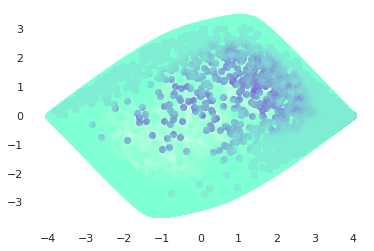

In [92]:
label_1='Negative Samples'
label_2='Negative Samples +  Noise'
title_text=None
# visualize(ae_model, x2 , x3 , color_1 ='orangered', color_2='chartreuse', label_1=label_1, label_2=label_2, title_text=title_text,figname='negative_samples1.jpg')
visualize(ae_model, x2, x3 , color_1 ='blueviolet', color_2='aquamarine', label_1=label_1, label_2=label_2, title_text=title_text,figname='negative_samples_v2.png')


In [56]:
idx = np.arange(x2.shape[0])
np.random.shuffle(idx)
idx = idx[:5000]
a = x2[idx]
b = x3[idx]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 0.502s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.145531
[t-SNE] KL divergence after 1000 iterations: 0.822421
Out put shape : (10000, 2

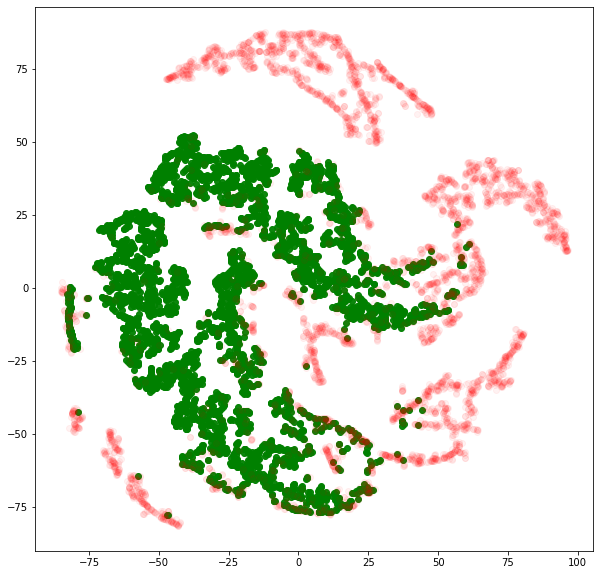

In [32]:
viz_tsne(ae_model, a, b, num_components = 2)

In [37]:
def visualize_exp1(
    model_obj, x1, color_1=None, color_2=None, label_1=None, label_2=None, title_text=None,figname=None
):
    from sklearn.decomposition import TruncatedSVD
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches

    x1 = model_obj.get_compressed_embedding(x1)
#     x2 = model_obj.get_compressed_embedding(x2)
    
    x1 = np.array(x1)
#     x2 = np.array(x2)
    if x1.shape[1] > 2 :
        svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)
#         x = np.vstack([x1, x2])
        x3 = svd.fit_transform(x2)
    else:
        x3 = np.vstack([x1, x2])
        
    plt.figure(figsize=[10, 10])
    plt.scatter(x3[:, 0], x3[:, 1], c='g', alpha=0.5)
    
    noise = np.random.sample([x3.shape[0],2])
    noise = x3 + noise
    plt.scatter(noise[:, 0], noise[:, 1], c='r', alpha=0.05)
    plt.show()
    return

    if color_1 is None:
        color_1 = 'g'
    if color_2 is None:
        color_2 = 'r'
    
    svd = TruncatedSVD(n_components=3, n_iter=100, random_state=42)
    x = np.vstack([x1, x2])
    x3 = svd.fit_transform(x)
    fig = plt.figure(figsize=[12, 10])
    ax = fig.add_subplot(111, projection='3d')
    
   
    ax.scatter(x3[:len(x1), 0], x3[:len(x1), 1], x3[:len(x1), 2], c=color_1, alpha=1.0, marker='D', s=8.5)
    ax.scatter(x3[len(x1):, 0], x3[len(x1):, 1], x3[len(x1):, 2], c=color_2, alpha=0.0500, marker = 'o',s=2.5)
    
    ax.set_xlabel('X Axis',fontsize=24, color='darkcyan')
    ax.set_ylabel('Y Axis',fontsize=24,  color='darkcyan')
    ax.set_zlabel('Z Axis',fontsize=24, color='darkcyan')
    ax.view_init(elev=10, azim=60)
    patch_1 = mpatches.Patch(color=color_1, label=label_1)
    patch_2 = mpatches.Patch(color=color_2, label=label_2)
    plt.legend(handles=[patch_1, patch_2], loc='lower left',fontsize=24)
    if title_text is not None:
        plt.title(title_text)

    ax.set_facecolor('w')
    plt.tight_layout()
    try:
        plt.savefig(figname, pad_inches=0.01, dpi=200)
    except:
        pass
    try:
        plt.show()
        plt.close()
    except:
        pass
    return

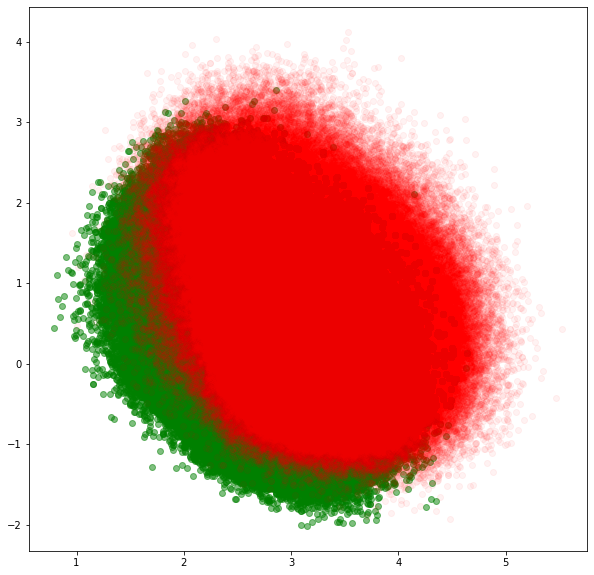

In [38]:
visualize_exp1(ae_model, x2, color_1 ='lime', color_2='deeppink', label_1=label_1, label_2=label_2, title_text=title_text,figname='negative_samples1.png')


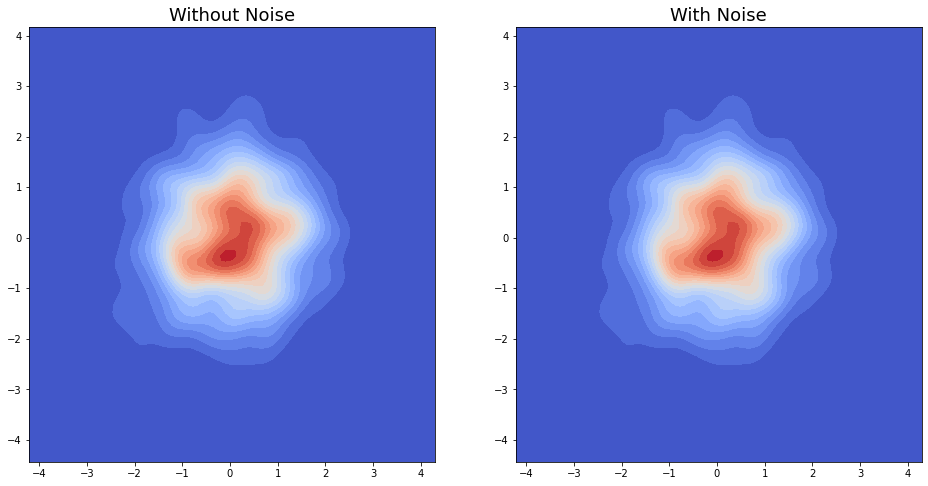

In [120]:
fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(121)
ax = sns.kdeplot(noise[:1000,0], noise[:1000,1], n_levels=20, cmap="coolwarm",shade=True)
plt.title('Without Noise',fontsize=18)
ax = fig.add_subplot(122)
ax = sns.kdeplot(noise[:1000,0], noise[:1000,1], n_levels=20, cmap="coolwarm",shade=True)
plt.title('With Noise',fontsize=18)
plt.show()

In [139]:
def visualize2(model_obj, x1, x2, color_1=None, color_2=None, label_1=None, label_2=None, title_text=None,figname=None):
    from sklearn.decomposition import TruncatedSVD
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches

    x1 = model_obj.get_compressed_embedding(x1)
    x2 = model_obj.get_compressed_embedding(x2)
    
    x1 = np.array(x1)
    x2 = np.array(x2)
      
    svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)
    x = np.vstack([x1, x2])
    x3 = svd.fit_transform(x)
    
    # ----------------------------------------
    
    fig = plt.figure(figsize=[10, 5])
#     plt.ylabel('Y-axis',fontsize=18)
#     plt.ylabel('Y-axis',fontsize=18)

    count = x1.shape[0]
    ax = fig.add_subplot(121)
    ax = sns.kdeplot(x3[:count, 0][:10000], x3[:count, 1][:10000], n_levels=5, cmap="Blues_d",shade=False)
    plt.title(label_1,fontsize=18)
    ax = fig.add_subplot(122)
    ax = sns.kdeplot(x3[count:, 0][:10000], x3[count:, 1][:10000], n_levels=5, cmap="Blues_d",shade=False)
    plt.title(label_2,fontsize=22)
    
#     plt.tight_layout()
#     try:
#         plt.savefig(figname, pad_inches=0.01, dpi=75)
#     except:
#         pass
    try:
        plt.show()
        plt.close()
    except:
        pass
    return

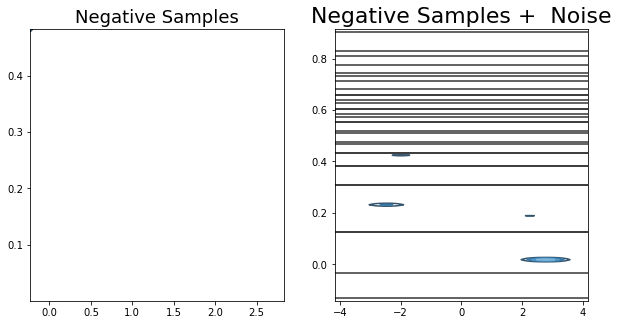

In [140]:
label_1='Negative Samples'
label_2='Negative Samples +  Noise'
title_text=None
visualize2(ae_model, x2 , x3 , color_1 ='red', color_2='blue', label_1=label_1, label_2=label_2, title_text=title_text,figname='negative_samples_v2.jpg')

In [142]:
x3.shape

(680940, 116)

In [144]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

z1 = ae_model.get_compressed_embedding(x2)
z2 = ae_model.get_compressed_embedding(x3)

z1 = np.array(z1)
z2 = np.array(z2)

svd = TruncatedSVD(n_components=2, n_iter=100, random_state=42)
z = np.vstack([z1, z2])
z3 = svd.fit_transform(z)

In [145]:
count = z1.shape[0]

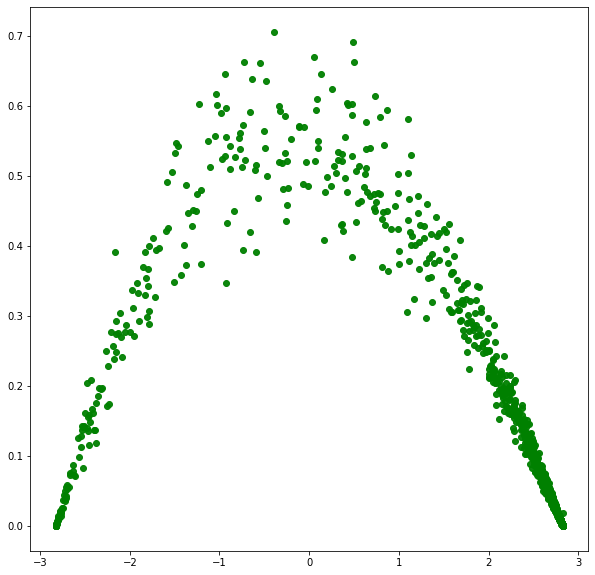

In [147]:
plt.figure(figsize=[10, 10])
plt.scatter(z3[:count, 0], z3[:count, 1], c='g', alpha=0.95)
# plt.scatter(z3[count:, 0], z3[count:, 1], c='r', alpha=0.35)
plt.show()

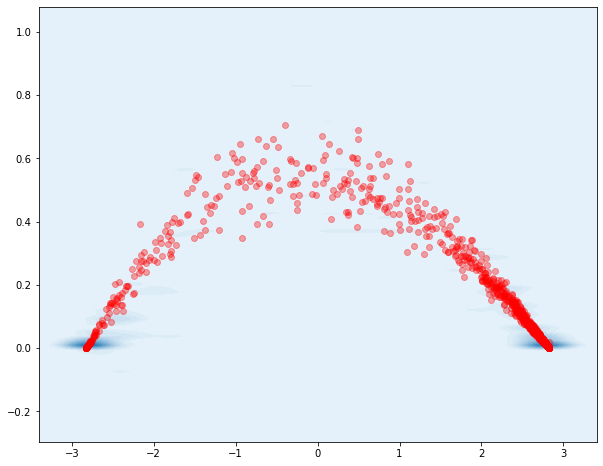

In [169]:
fig1 = plt.figure(figsize=[10, 8])
sns.kdeplot(z3[count:, 0], z3[count:, 1], n_levels=25, shade=True)
plt.scatter(z3[:count, 0], z3[:count, 1], c='r', alpha=0.35)
plt.show()

Text(0.5, 1.0, 'Negative Samples +  Noise')

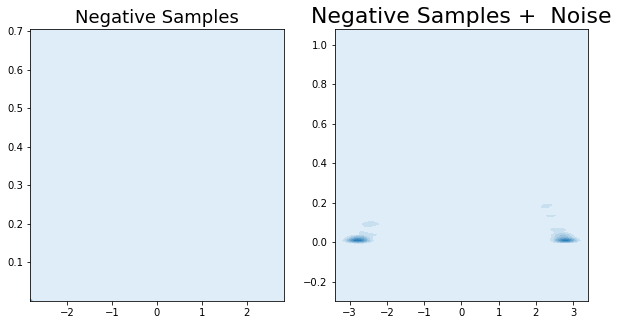

In [165]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(121)
ax1 = sns.kdeplot(z3[:count, 0], z3[:count, 1], n_levels=10,shade=True)
plt.title(label_1,fontsize=18)
ax2 = fig.add_subplot(122)
ax2 = sns.kdeplot(z3[count:, 0], z3[count:, 1], n_levels=10,shade=True)
plt.title(label_2,fontsize=22)

In [166]:
plt.show()

In [167]:
plt.savefig('viz_figure.png')

<Figure size 432x288 with 0 Axes>

In [186]:
x4 = np.array(pos)
noise = np.random.normal(loc=0.0, scale=1.0, size=x4.shape)
x5 = x4 + noise

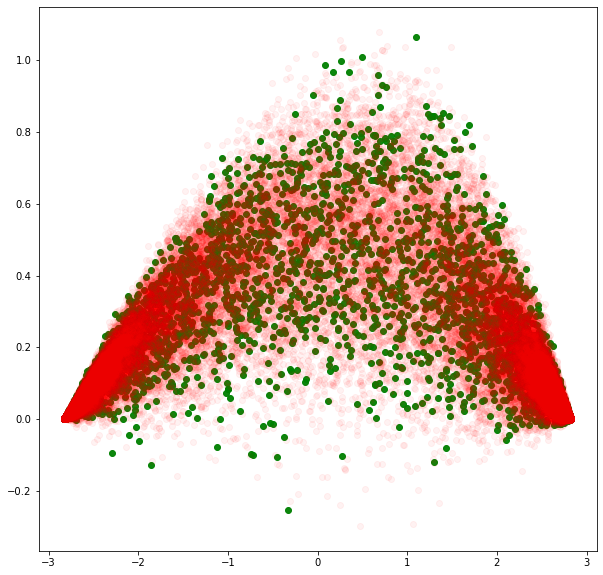

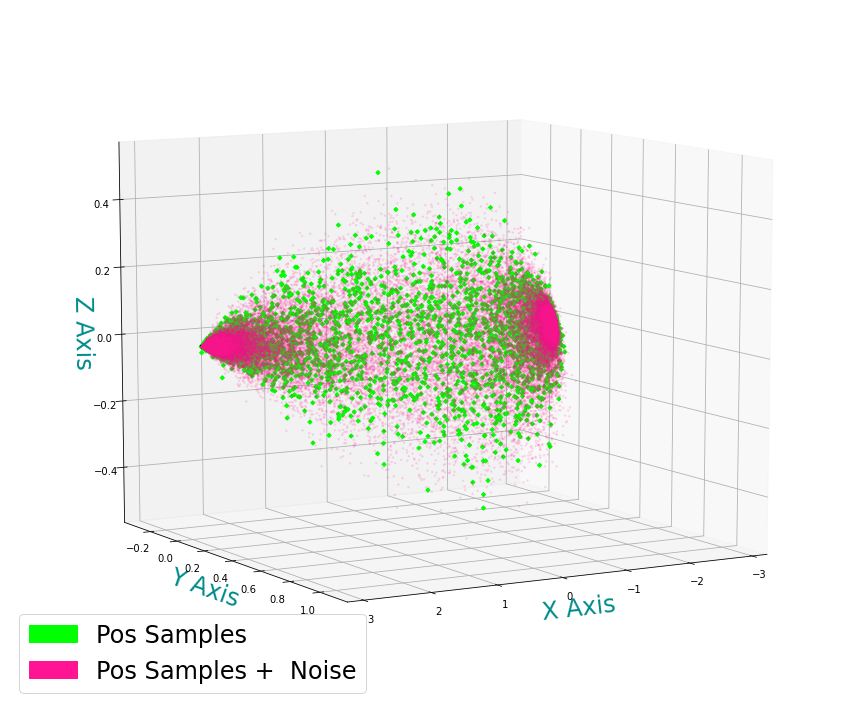

In [188]:
label_1='Pos Samples'
label_2='Pos Samples +  Noise'
title_text=None
# visualize(ae_model, x2 , x3 , color_1 ='orangered', color_2='chartreuse', label_1=label_1, label_2=label_2, title_text=title_text,figname='negative_samples1.jpg')
visualize(ae_model, x5 , x3 , color_1 ='lime', color_2='deeppink', label_1=label_1, label_2=label_2, title_text=title_text,figname='pos_samples1.jpg')
